In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply

In [2]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = './data/stroke.csv'

# The data is read and saved in a variable (stroke)
stroke = pd.read_csv(data)

stroke = pd.DataFrame(stroke)


stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# get and print info on the stroke dataframe
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# checking for all the unique values under the work_type variable/column
stroke["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [5]:
# data standardization - chnaging the uppercase 'R' to lowercase 'r' 
stroke = stroke.rename(columns={"Residence_type": "residence_type"})


In [6]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke_copy = stroke.copy() # Creating a copy of the stroke dataset for experimentation
stroke_dropna = stroke.copy() # dataset copy to be used for dropna() action
stroke_fillna = stroke.copy() # Dataset copy to be used for data imputing using forward/back filling method


In [8]:
# stroke_copy.fillna(method='ffill')
# stroke_copy.fillna(method='bfill')

# Dropping rows that have missing or NaN values in one or more rows, then printing the remaining rows in the dataset  
# Rows without Nan or missing values
stroke_dropna = stroke_dropna.dropna()
stroke_dropna

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
# stroke_copy = pd.DataFrame(stroke_copy)

# Printing all rows with missing or 'NaN' values in one or more cells
nan_rows = stroke_copy[stroke_copy.isnull().any(axis=1)]
nan_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [10]:
# to filter by column - This confirms only bmi has missing or NaN (Not a number) values
# futher exploration can be done on this copy of the dataset
stroke_copy[stroke_copy['bmi'].isnull()]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [11]:
stroke_copy = stroke_copy.drop(['id'], axis=1)
stroke_copy

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


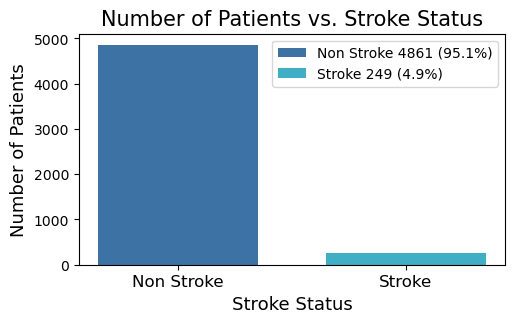

In [125]:
# Count patients in each stroke category (0 = No, 1 = Yes)
sum_stroke = stroke_copy['stroke'].value_counts().sort_index()

# Calculate percentages
total = sum_stroke.sum()
percentages = (sum_stroke / total * 100).round(1)

# Create figure
fig, ax = plt.subplots(figsize=(5.5,3))

# Plot bars
bars = ax.bar(sum_stroke.index, sum_stroke.values,
              color=['#3c73a4', '#40aec4'],
              width=0.7)

# Build legend labels with counts + percentages
legend_labels = [
    f'Non Stroke {sum_stroke[0]} ({percentages[0]}%)',
    f'Stroke {sum_stroke[1]} ({percentages[1]}%)'
]

# Attach labels to each bar
for bar, label in zip(bars, legend_labels):
    bar.set_label(label)

# Add legend
ax.legend(loc='upper right')

# Titles and labels
ax.set_title('Number of Patients vs. Stroke Status', fontsize=15)
ax.set_xlabel('Stroke Status', fontsize=13)
ax.set_ylabel('Number of Patients', fontsize=13)
ax.set_xticks([0,1])
ax.set_xticklabels(['Non Stroke','Stroke'], fontsize=12)

plt.show()

In [13]:
stroke_copy['stroke'].sum()


249

In [111]:
with_stroke = stroke.copy() # Dataset copy of observations with stroke to be used for data correlation. 
with_stroke.drop(['id'], axis=1, inplace=True)
with_stroke=  with_stroke[with_stroke['stroke']==1]
with_stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [114]:

# Número de pacientes con ever_married == 'No'
no_count = (stroke['ever_married'] == 'Yes').sum()

# Total de pacientes con valor en la columna ever_married
total_count = stroke['ever_married'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients never married: {married_mean:.1f}%")


Percentage of patients never married: 65.6%


In [ ]:

# Número de pacientes con ever_married == 'No'
no_count = (stroke['ever_married'] == 'Yes').sum()

# Total de pacientes con valor en la columna ever_married
total_count = stroke['ever_married'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients never married: {married_mean:.1f}%")

In [120]:
# Número de pacientes per gender == 'No'
no_count = (with_stroke['gender'] == 'Female').sum()

# Total de pacientes con valor en la columna ever_married
total_count = with_stroke['gender'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients per gender: {married_mean:.1f}%")



Percentage of patients per gender: 56.6%


In [124]:
# Contar personas con edad >= 57
over_equal_57_count = (stroke_copy['age'] < 57).sum()

# Contar total de personas con edad registrada
total_count = stroke_copy['age'].notna().sum()

# Calcular porcentaje
over_equal_57_pct = (over_equal_57_count / total_count) * 100

print(f"Percentage of people aged 57 or older: {over_equal_57_pct:.1f}%")


Percentage of people aged 57 or older: 68.3%


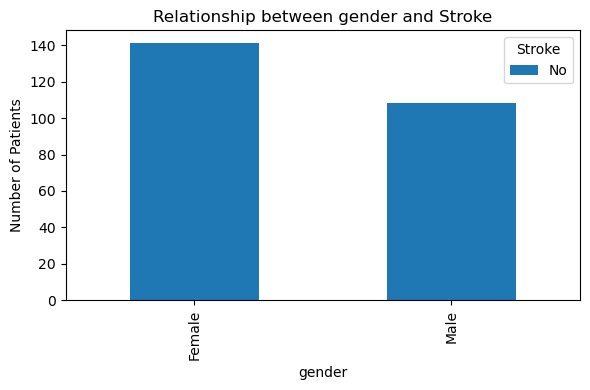

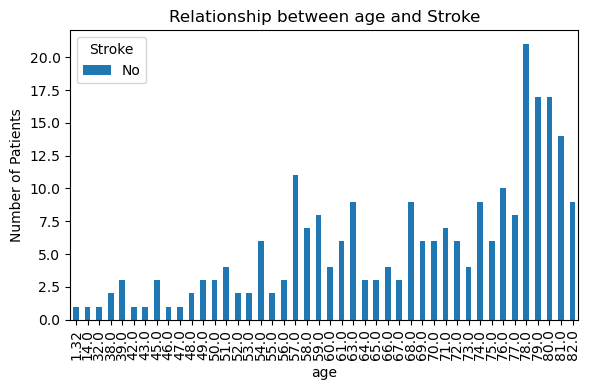

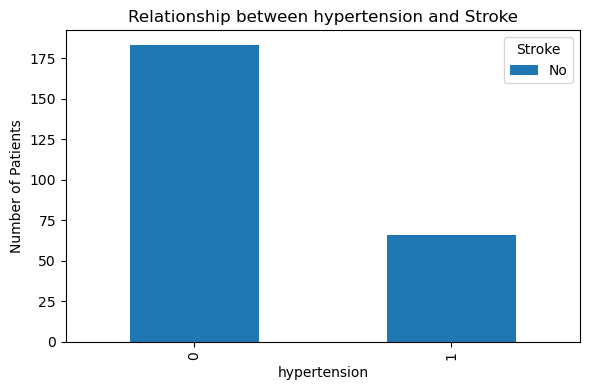

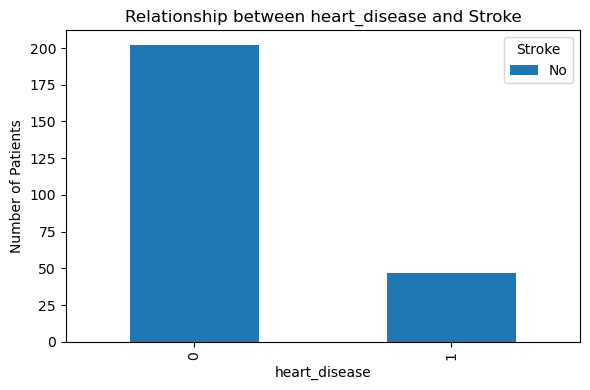

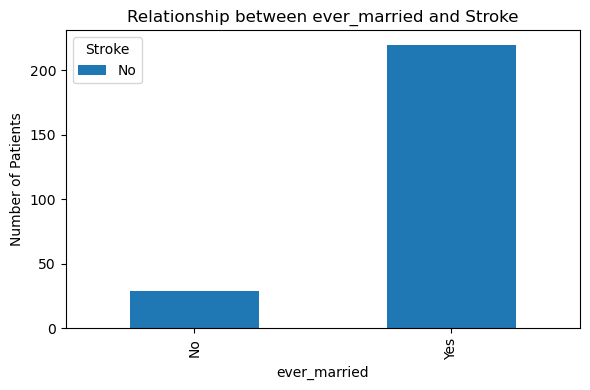

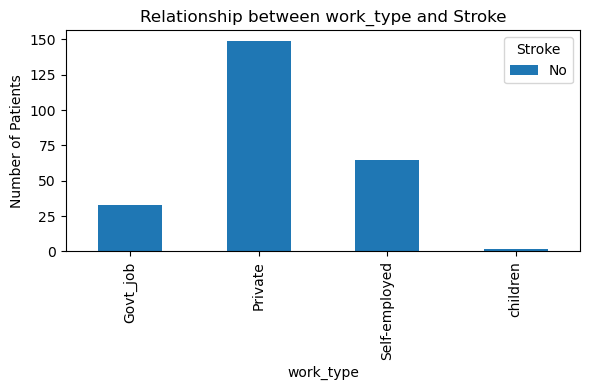

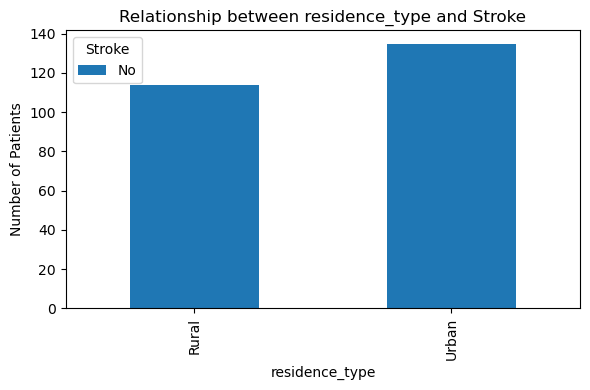

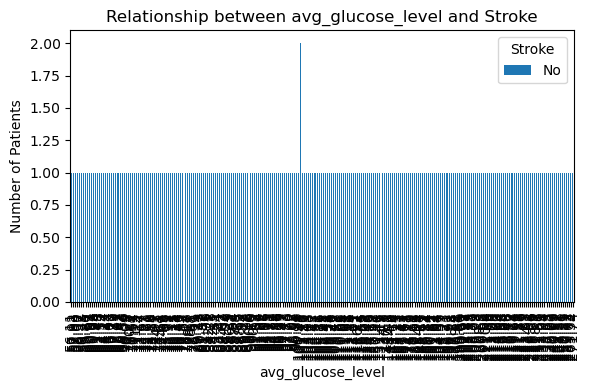

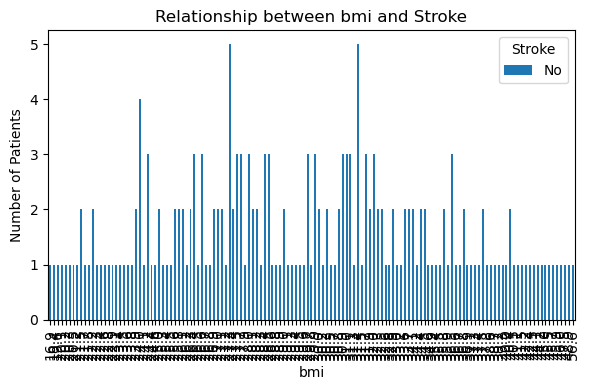

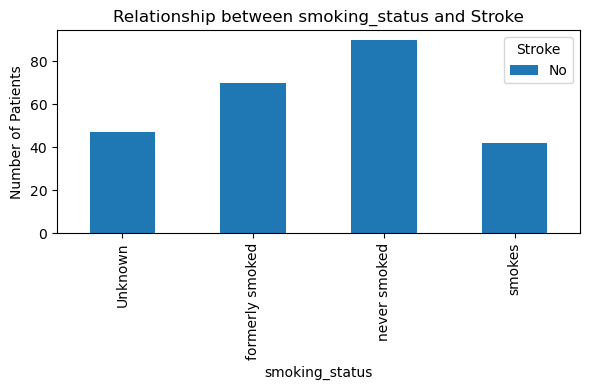

In [15]:
# Get feature names and plot patients with stroke


# Assume your DataFrame is called with_stroke and has 11 columns including 'stroke'
for col in with_stroke.columns:
    if col != 'stroke':
        # Group by variable and stroke
        counts = with_stroke.groupby([col, 'stroke']).size().unstack(fill_value=0)
        
        # Plot stacked bar chart
        counts.plot(kind='bar', stacked=True, figsize=(6,4))
        plt.title(f'Relationship between {col} and Stroke')
        plt.xlabel(col)
        plt.ylabel('Number of Patients')
        plt.legend(title='Stroke', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

- Glucose average: 
	- min value is 55, max value is 271, we can’t take the mean, 
	- we could separated in groups: to take in consideracion, aleatory glucose test  in value more than 200 mg/dl is diagnosis of Diabetes, therefore it is other comorbidity (we need to consider that in the analysis, it is another risk factor, sometimes patients arrive ‘without chronic diseases’ but they have it underdiagnosticated several years ago
	-  I suggest this groups according with the American society of diabetes:  
		- 140 mg/dl or less (use to be a normal value)
		- 141 to 199 mg/dl  (prediabetes or oral glucose intolerance)
		- More than 200 mg/dl Diabetes.


- BMI: min value 10.3 and max value 97.6
	- We can use de BMI classification from the CDC: 
		- <18.5: Underweight
		- 18.5>25 Healthy Weight
		- 25>=30: Overweight
		- >= 30 Obesity

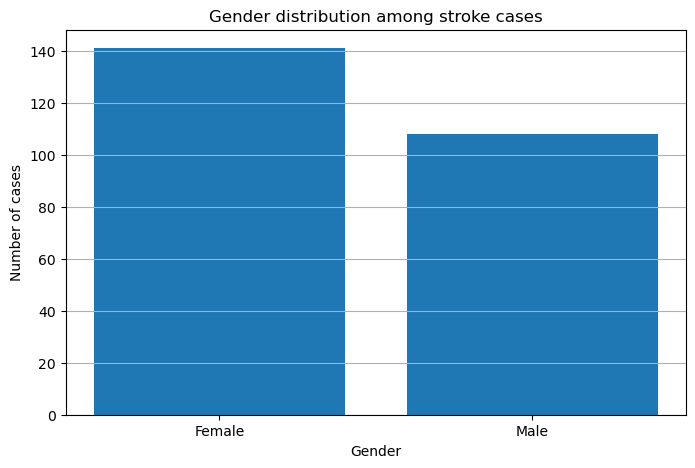

In [16]:
#Graphics: 
# Define variables for Graphic 1: General Vision icu_crci_total vs. Date Day in Ontario Area:

# Count cases by gender
gender_counts = with_stroke['gender'].value_counts()

# Create bar chart
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(gender_counts.index, gender_counts.values)

ax.set_title("Gender distribution among stroke cases")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of cases")
ax.grid(axis = 'y')

plt.show()




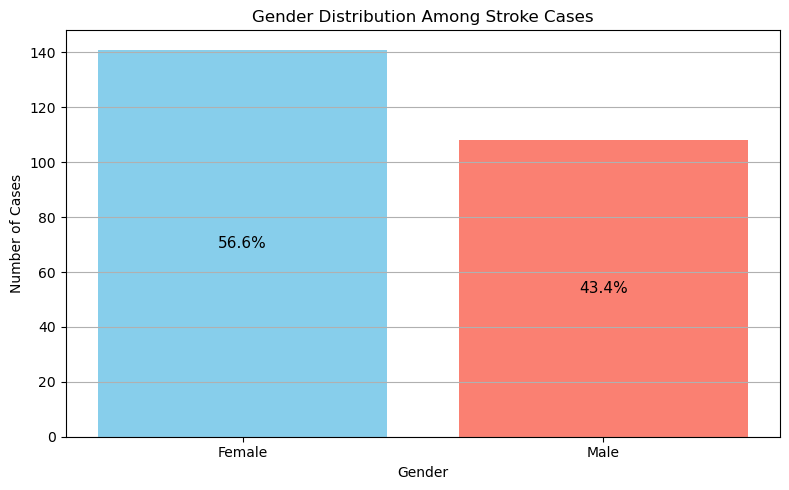

In [102]:

# Count cases by gender
gender_counts = with_stroke['gender'].value_counts()

# Calculate percentages
percentages = (gender_counts / gender_counts.sum()) * 100

# Create bar chart
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(gender_counts.index, gender_counts.values, color=['skyblue','salmon'])

# Add percentage labels on top of bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2,   # inside the bar
            f"{pct:.1f}%", ha='center', va='center', fontsize=11, color='black')

# Labels in English
ax.set_title("Gender Distribution Among Stroke Cases")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Cases")
ax.grid(axis='y')

plt.tight_layout()
plt.show()


# Stroke vrs comorbilities: HTA and HD Comparative graphics with and without stroke

- Columns of interesr stroke, hypertension and heart_disease 

In [17]:
# df copy to graph comorbilities in patients with and without stroke: HTA and HD
comorb_df = stroke[['hypertension','heart_disease','stroke']].copy()
comorb_df.head()


,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


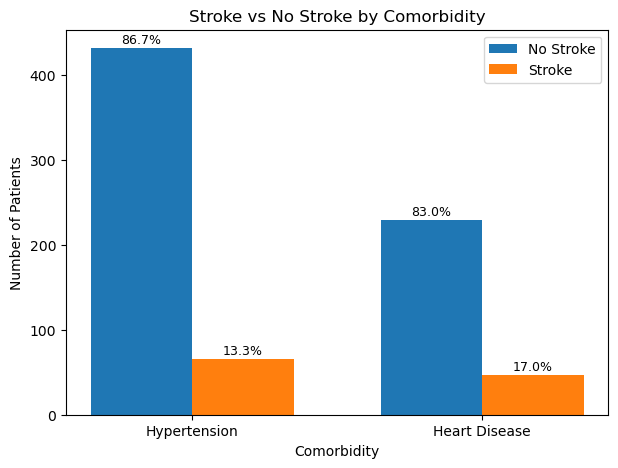

In [18]:
#Graphic: Patients with stroke and HTA vrs patients without stroke and HTA, 
# Patients with stroke and hear disease vrs patients without stroke and Heard disease, 

# Counts for hypertension
hta_stroke = ((risk_f_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()

# Counts for heart disease
hd_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()
hd_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()

# Organize data for plotting
labels = ['Hypertension', 'Heart Disease']
stroke_counts = [hta_stroke, hd_stroke]
no_stroke_counts = [hta_no_stroke, hd_no_stroke]

x = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(7,5))

# Bars
bars_no = ax.bar(x, no_stroke_counts, width=bar_width, label='No Stroke')
bars_yes = ax.bar(x + bar_width, stroke_counts, width=bar_width, label='Stroke')

# Add percentage labels above each bar
for i in range(len(labels)):
    total = no_stroke_counts[i] + stroke_counts[i]
    
    # No Stroke bar
    pct_no = (no_stroke_counts[i] / total) * 100 if total > 0 else 0
    ax.text(
        bars_no[i].get_x() + bars_no[i].get_width()/2,
        bars_no[i].get_height() + 2,
        f"{pct_no:.1f}%",
        ha='center', va='bottom', fontsize=9
    )
    
    # Stroke bar
    pct_yes = (stroke_counts[i] / total) * 100 if total > 0 else 0
    ax.text(
        bars_yes[i].get_x() + bars_yes[i].get_width()/2,
        bars_yes[i].get_height() + 2,
        f"{pct_yes:.1f}%",
        ha='center', va='bottom', fontsize=9
    )

# Labels and formatting
ax.set_xlabel("Comorbidity")
ax.set_ylabel("Number of Patients")
ax.set_title("Stroke vs No Stroke by Comorbidity")
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()




# Stroke vrs comorbility

In the observations with HTA, 13.3% had a stroke
In the observtions with Heart disease, 17% had stroke. 

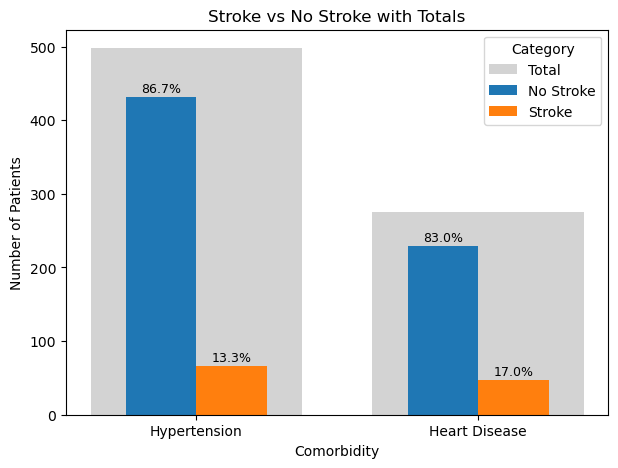

In [19]:
#Graphic: Patients with stroke and HTA vrs patients without stroke and HTA, 
# Patients with stroke and hear disease vrs patients without stroke and Heard disease, 
# In gray # of patients with stroke and without HTA, and # of patients without stroke, without HTA

# Step 1: Build counts by comorbidity and stroke status
counts = {
    'Hypertension': [
        ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum(),  # no stroke
        ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()   # stroke
    ],
    'Heart Disease': [
        ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum(),
        ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()
    ]
}

# Step 2: Convert to DataFrame for plotting
pivot_df = pd.DataFrame(counts, index=['No Stroke','Stroke']).T

# Add totals column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Step 3: Plot grouped bars with totals
fig, ax = plt.subplots(figsize=(7,5))
bar_width = 0.25
x = np.arange(len(pivot_df.index))

# Grey bars for totals
ax.bar(x, pivot_df['Total'], width=bar_width*3, color='lightgrey', zorder=0, label='Total')

# Bars for stroke categories + percentages
for i, sub_cat in enumerate(['No Stroke','Stroke']):
    values = pivot_df[sub_cat]
    bars = ax.bar(x + (i-0.5)*bar_width, values, width=bar_width, label=sub_cat, zorder=1)
    
    # Add percentage labels above each bar
    for j, bar in enumerate(bars):
        total = pivot_df['Total'].iloc[j]
        pct = (values.iloc[j] / total) * 100 if total > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 2,   # slightly above the bar
            f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Labels and formatting
ax.set_xlabel("Comorbidity")
ax.set_ylabel("Number of Patients")
ax.set_title("Stroke vs No Stroke with Totals")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Category")

plt.show()



# In the last grhapic: 
- Gray: total patient with comorbility: HTA or Heart Disease
- Blue: from patients with HTA or HD # of patientes without strok
- Orange: from patients with HTA or HD # of patientes with strok

- From patienes with HTA, 13.3% had a stroke and 86.7% not.
- From Patientes with heart disease: 17% had a stroke and 83% not. 

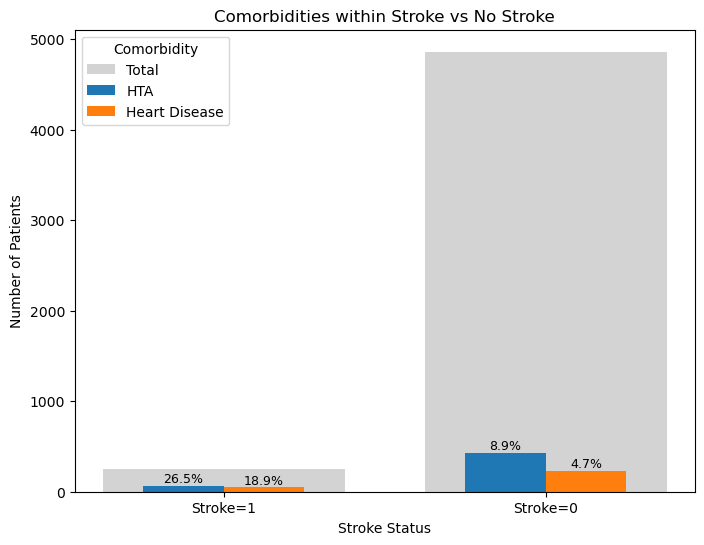

In [20]:
# Comparation ptes with and without stroke, vrs how many have comorbilities


# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()

# Step 2: Build DataFrame
data = {
    'Stroke=1': {'HTA': hta_stroke, 'Heart Disease': hd_stroke, 'Total': stroke_yes_total},
    'Stroke=0': {'HTA': hta_no_stroke, 'Heart Disease': hd_no_stroke, 'Total': stroke_no_total}
}
pivot_df = pd.DataFrame(data)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.25
x = np.arange(len(pivot_df.columns))

# Grey bars for totals
ax.bar(x, pivot_df.loc['Total'], width=bar_width*3, color='lightgrey', zorder=0, label='Total')

# Bars for HTA and Heart Disease
for i, sub_cat in enumerate(['HTA','Heart Disease']):
    values = pivot_df.loc[sub_cat]
    bars = ax.bar(x + (i-0.5)*bar_width, values, width=bar_width, label=sub_cat, zorder=1)
    
    # Add percentage labels
    for j, bar in enumerate(bars):
        total = pivot_df.loc['Total'].iloc[j]
        pct = (values.iloc[j] / total) * 100 if total > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 2,
            f"{pct:.1f}%",
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Labels and formatting
ax.set_xlabel("Stroke Status")
ax.set_ylabel("Number of Patients")
ax.set_title("Comorbidities within Stroke vs No Stroke")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.columns)
ax.legend(title="Comorbidity")

plt.show()

 




# In the gray column: total patientes with and without stroke. 
We cansee thaat comparing patients whit stroke, and observations without stroke, the % of patients with stroke that has HTA are bigger, and the % of patientes with HD are bigger as well, therefore, there are a statistical diference.
- 26% of patients with stroke has HTA vrs 8,9% whitout stroke.
- 18.9 % of patients with stroke has HD vrs 4.7% patienes without Stroke

## tornado chart with matplotlib 

In [21]:
## Means HTA and HD

# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()


# Calculate the mean: 
# Within stroke=1
hta_stroke_mean = (hta_stroke / stroke_yes_total)*100
hd_stroke_mean  = (hd_stroke / stroke_yes_total)*100

# Within stroke=0
hta_no_stroke_mean = (hta_no_stroke / stroke_no_total)*100
hd_no_stroke_mean  = (hd_no_stroke / stroke_no_total)*100



In [22]:
print("hta_no_stroke_mean:", hta_no_stroke_mean)
print("hd_no_stroke_mean:", hd_no_stroke_mean)
print("hta_stroke_mean:", hta_stroke_mean)
print("hd_stroke_mean:", hd_stroke_mean)

hta_no_stroke_mean: 8.887060275663444
hd_no_stroke_mean: 4.710964822053076
hta_stroke_mean: 26.506024096385545
hd_stroke_mean: 18.87550200803213


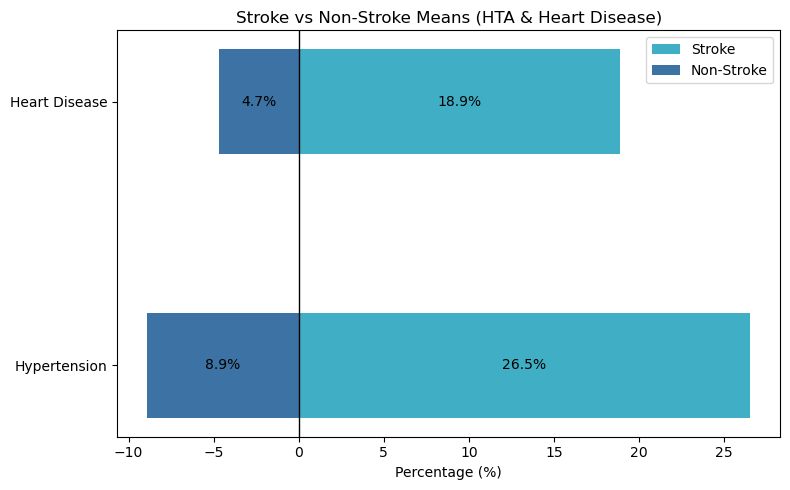

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Hypertension", "Heart Disease"]

# Values (percentages)
stroke_means = np.array([hta_stroke_mean, hd_stroke_mean])           # Stroke group
non_stroke_means = np.array([hta_no_stroke_mean, hd_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, but values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (HTA & Heart Disease)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Stroke vrs risk factors: smoke, BMI and Glucose level graphics with and without stroke


In [68]:
# df copy to graph risk factors in patients with and without stroke: smoke, BMI and Glucose

risk_f_df = stroke[['avg_glucose_level'	, 'bmi', 'smoking_status', 'stroke']].copy()
risk_f_df.head()

,avg_glucose_level,bmi,smoking_status,stroke
0,228.69,36.6,formerly smoked,1
1,202.21,NaN,never smoked,1
2,105.92,32.5,never smoked,1
3,171.23,34.4,smokes,1
4,174.12,24.0,never smoked,1


## BMI Categories

In [69]:

# Define the bins (boundaries) of x-axis categories
bins = [ 0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels = [ 'Underweight','Healthy Weight', 'Overweight', 'Obesity']

# Create a new column for BMI category type
risk_f_df['bmi_category'] = pd.cut(
    risk_f_df['bmi'],
      bins=bins, 
      labels=labels, 
      right=False)

In [73]:
print (risk_f_df['bmi_category'].unique())

['Obesity', NaN, 'Healthy Weight', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obesity']


In [88]:
print(risk_f_df['bmi'].isna().sum())

201


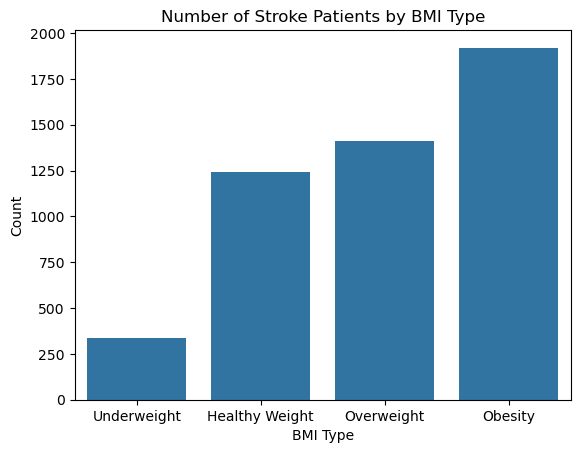

In [67]:
# Bar Plot for Count of patients by BMI (categories)
sns.countplot(data=risk_f_df, x='bmi_category', order=labels)
plt.title('Number of Stroke Patients by BMI Type')
plt.xlabel('BMI Type')
plt.ylabel('Count')
plt.show()

## Ojo. Pte imputar BMI NAN

In [82]:
## Means Overweight and Obesity vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
ow_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Within stroke=0
ow_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_no_stroke  = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_no_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_no_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Calculate the mean: 
# Within stroke=1
ow_stroke_mean = (ow_stroke / stroke_yes_total)*100
ob_stroke_mean  = (ob_stroke / stroke_yes_total)*100
hw_stroke_mean  = (hw_stroke / stroke_yes_total)*100
uw_stroke_mean  = (uw_stroke / stroke_yes_total)*100

# Within stroke=0
ow_no_stroke_mean = (ow_no_stroke / stroke_no_total)*100
ob_no_stroke_mean  = (ob_no_stroke / stroke_no_total)*100
hw_no_stroke_mean  = (hw_no_stroke / stroke_no_total)*100
uw_no_stroke_mean  = (uw_no_stroke / stroke_no_total)*100

In [ ]:
print("ow_no_stroke_mean:", ow_no_stroke_mean) # % patients with overweight and non stroke
print("ob_no_stroke_mean:", ob_no_stroke_mean) # % patients with Obesity and non stroke
print("hw_no_stroke_mean:", hw_no_stroke_mean) # % patients with healthy weight and non stroke
print("uw_no_stroke_mean:", uw_no_stroke_mean) # % patients with underweight and non stroke


print("ow_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("ob_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("hw_stroke_mean:", hw_stroke_mean) ## % patients with healthy weight and  stroke
print("uw_stroke_mean:", uw_stroke_mean) # % patients with underweight  and  stroke

ow_no_stroke_mean: 27.442912980868133
ob_no_stroke_mean: 37.481999588562026
hw_no_stroke_mean: 0.720016457519029
uw_no_stroke_mean: 0.02057189878625797
ow_stroke_mean: 39.3574297188755
ob_stroke_mean: 39.3574297188755
hw_stroke_mean: 14.056224899598394
uw_stroke_mean: 0.4016064257028112


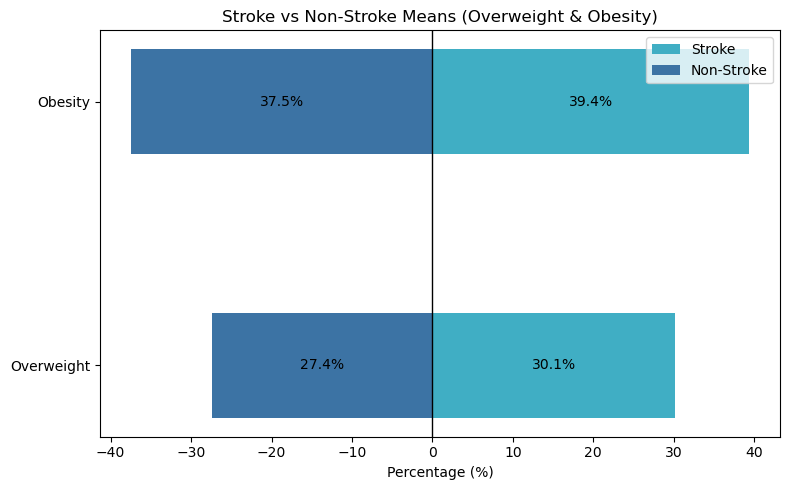

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Overweight & Obesity)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


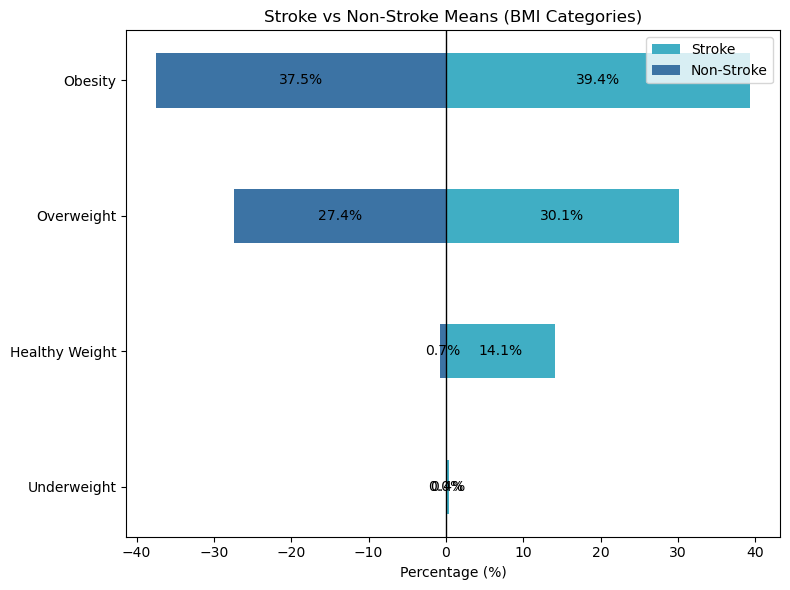

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([uw_stroke_mean, hw_stroke_mean, ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([uw_no_stroke_mean, hw_no_stroke_mean, ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (BMI Categories)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Smoke Categories

In [90]:
print((risk_f_df['smoking_status'] == 'Unknown').sum())

1544


In [91]:
print (risk_f_df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [128]:
## Means smoking status vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
f_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'smoked')).sum()
n_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Within stroke=0
f_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_no_stroke  = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'smoked')).sum()
n_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'never somoked')).sum()
unk_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Calculate the mean: 
# Within stroke=1
f_smk_stroke_mean = (f_smk_stroke / stroke_yes_total)*100
smk_stroke_mean  = (smk_stroke / stroke_yes_total)*100
n_smk_stroke_mean  = (n_smk_stroke / stroke_yes_total)*100
unk_smk_stroke_mean  = (unk_smk_stroke / stroke_yes_total)*100

# Within stroke=0
f_smk_no_stroke_mean = (f_smk_no_stroke / stroke_no_total)*100
smk_no_stroke_mean  = (smk_no_stroke / stroke_no_total)*100
n_smk_no_stroke_mean  = (n_smk_no_stroke / stroke_no_total)*100
unk_smk_no_stroke_mean  = (unk_smk_no_stroke / stroke_no_total)*100

In [129]:
print("f_smk_no_stroke_mean:", f_smk_no_stroke_mean) # % patients with overweight and non stroke
print("smk_no_stroke_mean:", smk_no_stroke_mean) # % patients with Obesity and non stroke
print("n_smk_no_stroke_mean:", n_smk_no_stroke_mean) # % patients with Obesity and non stroke
print("unk_smk_no_stroke_mean:", unk_smk_no_stroke_mean) # % patients with Obesity and non stroke


print("f_smk_stroke_mean:", f_smk_stroke_mean) # % patients with Obesity  and  stroke
print("smk_stroke_mean:", smk_stroke_mean) # % patients with Obesity  and  stroke
print("n_smk_stroke_mean:", n_smk_stroke_mean) ## % patients with overweight and  stroke
print("unk_smk_stroke_mean:", unk_smk_stroke_mean) # % patients with Obesity  and  stroke

f_smk_no_stroke_mean: 16.766097510800247
smk_no_stroke_mean: 0.0
n_smk_no_stroke_mean: 0.0
unk_smk_no_stroke_mean: 30.79613248302818
f_smk_stroke_mean: 28.11244979919679
smk_stroke_mean: 0.0
n_smk_stroke_mean: 36.144578313253014
unk_smk_stroke_mean: 18.87550200803213


In [97]:
print((risk_f_df['smoking_status'] == 'smoked').sum())

0


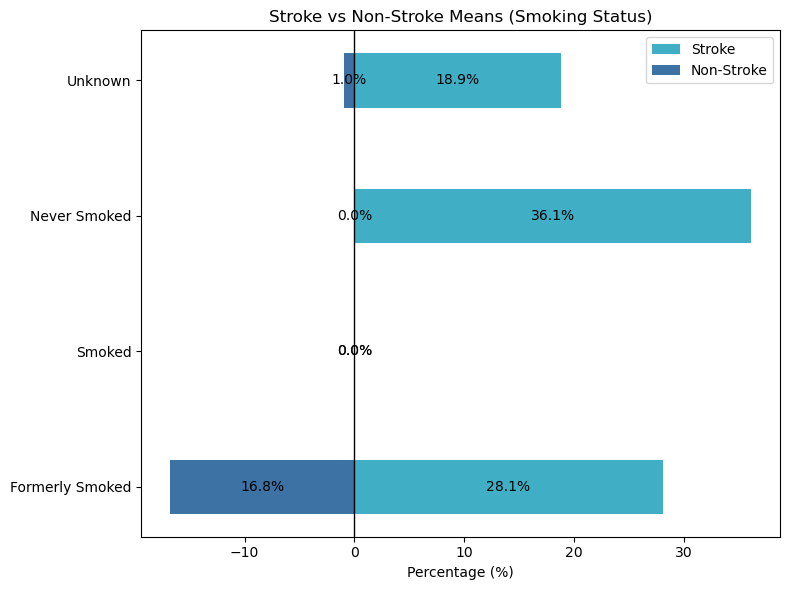

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Formerly Smoked", "Smoked", "Never Smoked", "Unknown"]

# Values (percentages)
stroke_means = np.array([
    f_smk_stroke_mean,
    smk__stroke_mean,
    n_smk_stroke_mean,
    unk_smk_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    f_smk_no_stroke_mean,
    smk_no_stroke_mean,
    n_smk_no_stroke_mean,
    unk_smk_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Smoking Status)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Age: we could observed a increase of stroke incidence after 58 years old with a peak after 78 years  old.
	¿how many people over 58 years old is married? and how many is single?

    Why is important?: 
    - Marital status: --% was married and --% was unmarried, however, --% of stroke observation had more than--years old, therefore, it is an inbalance of categorie and is dificult to make a conclution here. 

## Influence of Age on predictions: Survey value for customer age vrs Customer Age. Distribution. Correlation does not mean causation.
## 
